In [3]:
import sys

from matplotlib import pyplot as plt
%matplotlib widget
import numpy as np

filename = "raw2024_07_23T16_23_401.txt"
accelCharacter = '4'

In [200]:

file = open(filename,'rb')
lines = file.readlines()
# print(lines)
properlines = [line for line in lines if (len(line) == 18 and line[-2] == bytearray(accelCharacter,"ascii")[0])]
accelx = np.array([int.from_bytes(line[0:2],"big",signed=True) for line in properlines])
accely = np.array([int.from_bytes(line[2:4],"big",signed=True) for line in properlines])
accelz = np.array([int.from_bytes(line[4:6],"big",signed=True) for line in properlines])
temp = np.array([int.from_bytes(line[6:8],"big",signed=False) for line in properlines])
gyrox = np.array([int.from_bytes(line[8:10],"big",signed=True) for line in properlines])
gyroy = np.array([int.from_bytes(line[10:12],"big",signed=True) for line in properlines])
gyroz = np.array([int.from_bytes(line[12:14],"big",signed=True) for line in properlines])
micros = np.array([int.from_bytes(line[14:16],"big",signed=False) for line in properlines])


510
510
509
510
509
510
509
510
509
510
510
509
510
509
510
510
509
510
509
510
510
509
512
509
514
510
509
1021
510
515
1019
510
509
510
510
513
510
510
509
510
3567
509
510
509
510
510
509
510
509
510
509
510
510
509
510
510
509
510
511
510
509
510
509
510
511
511
509
514
509
510
510
511
510
514
509
510
510
509
1023
514
509
510
510
509
510
509
510
510
509
510
510
509
510
509
510
509
510
509
510
509
510
509
510
509
510
510
509
510
1019
510
509
510
509
512
510
509
510
510
509
510
511
514
509
510
509
510
510
513
510
513
510
509
510
510
1019
509
510
510
509
510
509
510
510
509
510
509
510
510
509
510
509
510
510
509
510
509
510
510
509
510
510
509
512
509
510
510
509
510
511
510
511
514
509
510
510
509
510
513
510
511
510
510
509
510
510
509
510
509
510
509
510
509
510
510
509
510
1019
510
509
510
510
509
510
509
510
512
509
510
509
510
510
511
510
509
514
509
510
510
511
510
513
510
509
510
510
509
1533
510
509
510
510
509
510
510
509
510
509
510
509
510
509
510
509
510
510
509
510
509


In [219]:
micros = np.array([int.from_bytes(line[14:16],"big",signed=False) for line in properlines])
offset = 0x10000
count = 0
manualCount = np.zeros(len(micros))
manualCount[132420] = 2
manualCount[133018] = 1
manualCount[133895] = 1
manualCount[134317] = 1
manualCount[135030] = 1
manualCount[135651] = 1
manualCount[136205] = 1
for i in range(len(micros) - 1):
    delta = micros[i+1] - micros[i]
    micros[i] = micros[i] + offset * (count + manualCount[i])
    if manualCount[i] > 0:
        count = count + manualCount[i]
    if delta < -50000:
        count = count + 1
    # if i >1:
        # print(micros[i] - micros[i -1 ])


ValueError: x and y must be the same size

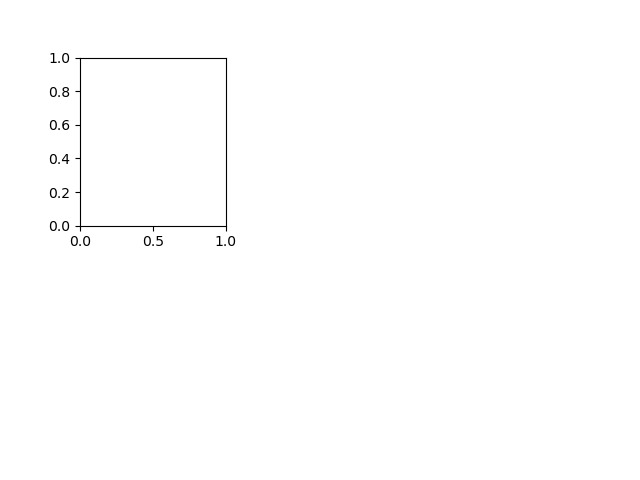

In [197]:
plt.close()
plt.figure()
plt.subplot(231)
plt.scatter(time,accelx*bytesToGs)
plt.title("accelx")
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [g]")
plt.subplot(232)
plt.scatter(time,accely*bytesToGs)
plt.title("accely")
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [g]")
plt.subplot(233)
plt.scatter(time,accelz*bytesToGs)
plt.title("accelz")
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [g]")
plt.subplot(234)
plt.scatter(time,gyrox*bytesToAngularFreq)
plt.title("gyrox")
plt.xlabel("Time [s]")
plt.ylabel("Angular Velocity [rad/s]")
plt.subplot(235)
plt.scatter(time,gyroy*bytesToAngularFreq)
plt.title("gyroy")
plt.xlabel("Time [s]")
plt.ylabel("Angular Velocity [rad/s]")
plt.subplot(236)
plt.scatter(time,gyroz*bytesToAngularFreq)
plt.title("gyroz")
plt.xlabel("Time [s]")
plt.ylabel("Angular Velocity [rad/s]")
plt.show()

In [188]:
bytesToGs = 4/0x7FFF # +-4 gs per half the range of bytes
bytesToAngularFreq = 250/0x7FFF # +-250 rad/s per half the range of bytes

In [84]:
data_condition = (micros > 72e6) & (micros < 74e6)
second_derivative = np.diff(gyroy[data_condition],2)
diff_condition =  np.abs(second_derivative) > 1000

In [55]:
second_derivative.size

3745

In [60]:
gyroy[data_condition][:-2][diff_condition]

array([   843,   -466, -27699, -28658,  -1666,   -761,   9571,   -985,
        -1889,  -6623,  -7560, -32372, -32211, -32351, -31780, -18850,
       -18279, -11044, -10357,  -7088,  -6203,    567,   1019,   5750,
        28643,  29311,  20500,  19690, -32768, -32768,  28343,  28718,
       -27945, -27887,     30,   -220,   3557, -11207, -11263,   4401])

In [59]:
micros[data_condition][:-2][diff_condition].size

40

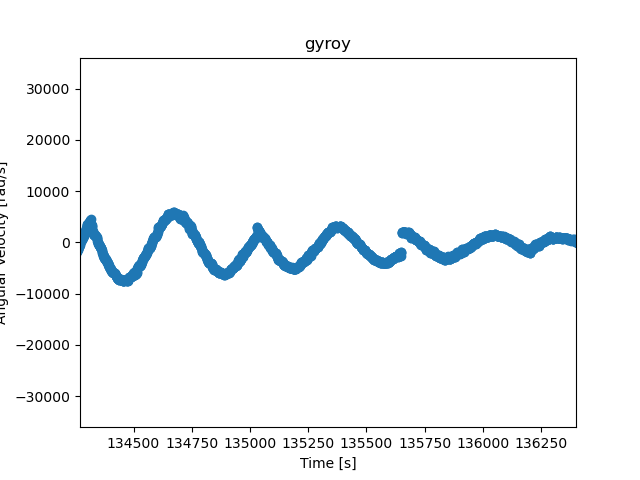

In [220]:
plt.close()
plt.figure()
plt.scatter(np.arange(len(gyroy)),gyroy)
plt.xlim(1.3427e5,1.364e5)
plt.title("gyroy")
plt.xlabel("Time [s]")
plt.ylabel("Angular Velocity [rad/s]")
# plt.scatter(micros[data_condition][:-2][diff_condition]*1e-6,gyroy[data_condition][:-2][diff_condition])
plt.show()

In [359]:
from scipy.optimize import curve_fit

t_start = 72.965
time = micros*1e-6-t_start
data_condition = (time >=0) & (time <=1.25)
gyro_offset = 2

def f(t,omega,tau,A,phi):
    return A*np.exp(-t/tau)*np.sin(t*omega - phi)

fit = curve_fit(f, time[data_condition],gyroy[data_condition]*bytesToAngularFreq+gyro_offset,[27,0.7,300,0])

In [360]:
fit[0]

array([ 2.73611121e+01,  7.22430556e-01,  2.32260999e+02, -7.47705573e-02])

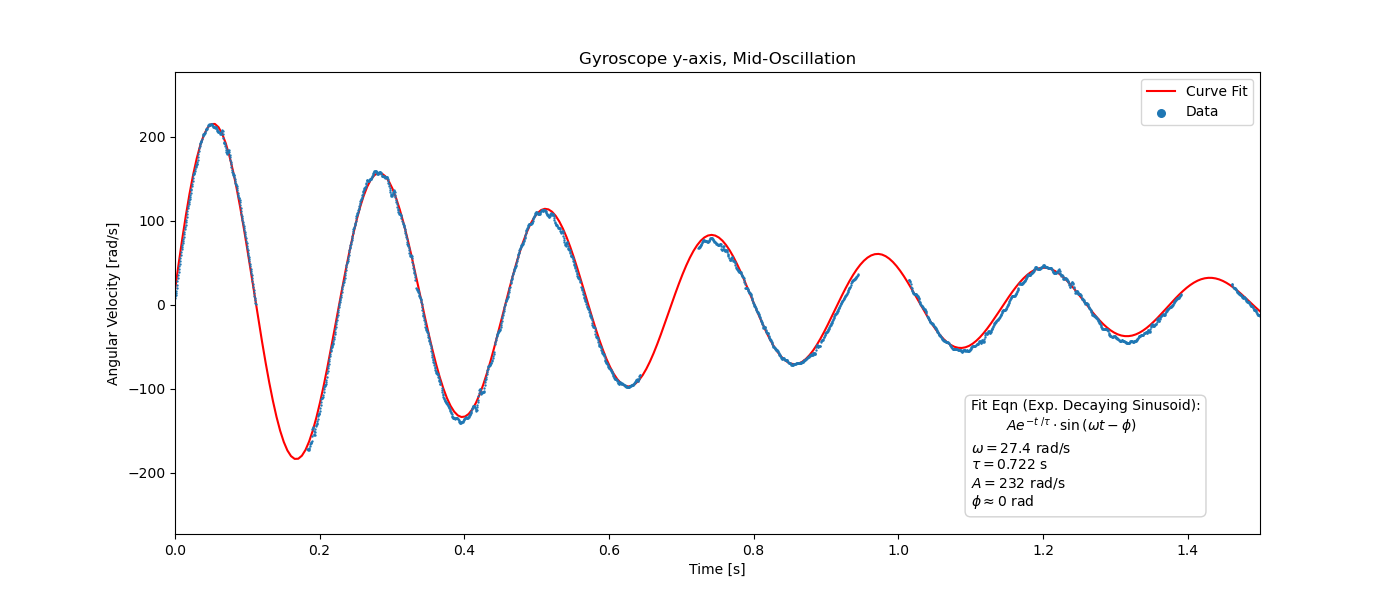

In [384]:
plt.close()
plt.figure(figsize=(14,6))
plt.xlim(0,1.5)
plt.title("Gyroscope y-axis, Mid-Oscillation")
plt.xlabel("Time [s]")
plt.ylabel("Angular Velocity [rad/s]")
t = np.linspace(0, 2,400)
plt.plot(t, fit[0][2]*np.exp(-t/fit[0][1])*np.sin(t*fit[0][0]-fit[0][3]),'r')
plt.scatter(time,gyroy*bytesToAngularFreq+gyro_offset,s=0.5,zorder=2)
legend = plt.legend(["Curve Fit","Data"], scatterpoints=1, fontsize=10)
legend.legend_handles[1]._sizes = [30]
plt.gca().text(1.1, -240, 'Fit Eqn (Exp. Decaying Sinusoid):\n\t$Ae^{-t\ /\\tau}\cdot\sin{(\omega t -\phi)}$\n$\omega=27.4\ \mathrm{rad/s}$\n$\\tau=0.722\ \mathrm{s}$\n$A=232\ \mathrm{rad/s}$\n$\phi\\approx 0\ \mathrm{rad}$', color='black', bbox=dict(facecolor='none', edgecolor='lightgrey', boxstyle='round,pad=0.4'))
plt.show()

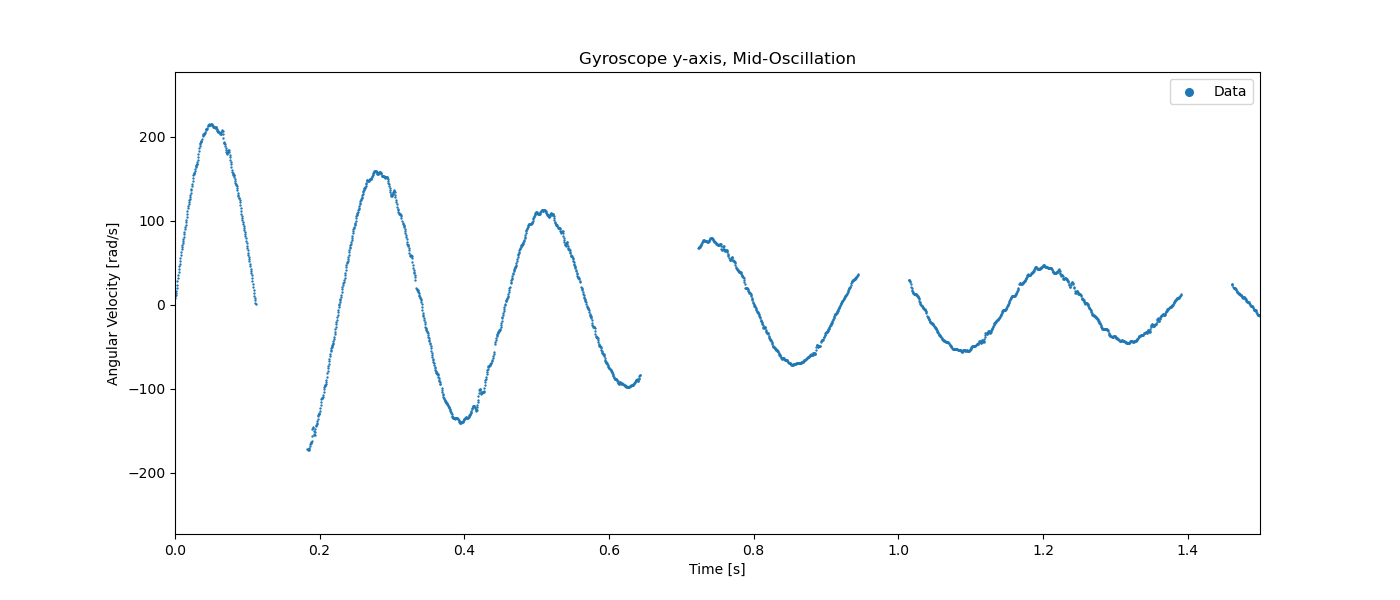

In [385]:
plt.close()
plt.figure(figsize=(14,6))
plt.xlim(0,1.5)
plt.title("Gyroscope y-axis, Mid-Oscillation")
plt.xlabel("Time [s]")
plt.ylabel("Angular Velocity [rad/s]")
t = np.linspace(0, 2,400)
# plt.plot(t, fit[0][2]*np.exp(-(t-fit[0][3])/fit[0][1])*np.sin(t*fit[0][0]-fit[0][4]),'r')
plt.scatter(time,gyroy*bytesToAngularFreq+gyro_offset,s=0.5,zorder=2)
legend = plt.legend(["Data"], scatterpoints=1, fontsize=10)
legend.legend_handles[0]._sizes = [30]
plt.show()

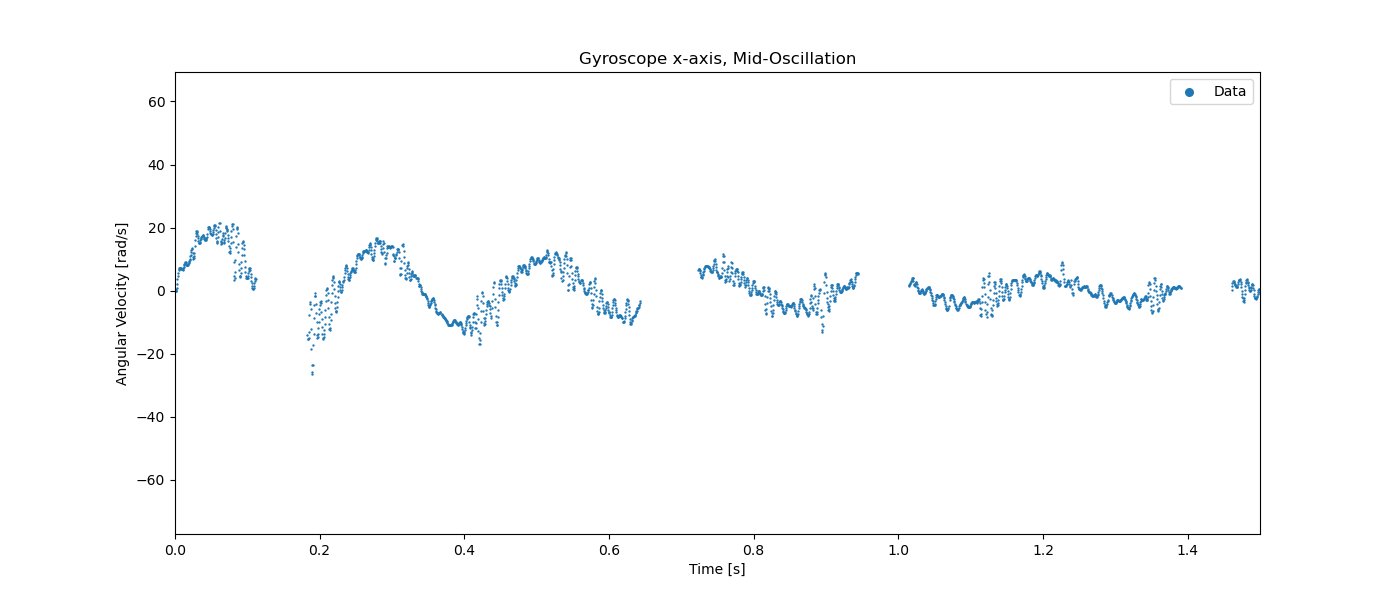

In [387]:
plt.close()
plt.figure(figsize=(14,6))
plt.xlim(0,1.5)
plt.title("Gyroscope x-axis, Mid-Oscillation")
plt.xlabel("Time [s]")
plt.ylabel("Angular Velocity [rad/s]")
t = np.linspace(0, 2,400)
# plt.plot(t, fit[0][2]*np.exp(-(t-fit[0][3])/fit[0][1])*np.sin(t*fit[0][0]-fit[0][4]),'r')
plt.scatter(time,gyrox*bytesToAngularFreq+gyro_offset,s=0.5,zorder=2)
legend = plt.legend(["Data"], scatterpoints=1, fontsize=10)
legend.legend_handles[0]._sizes = [30]
plt.show()

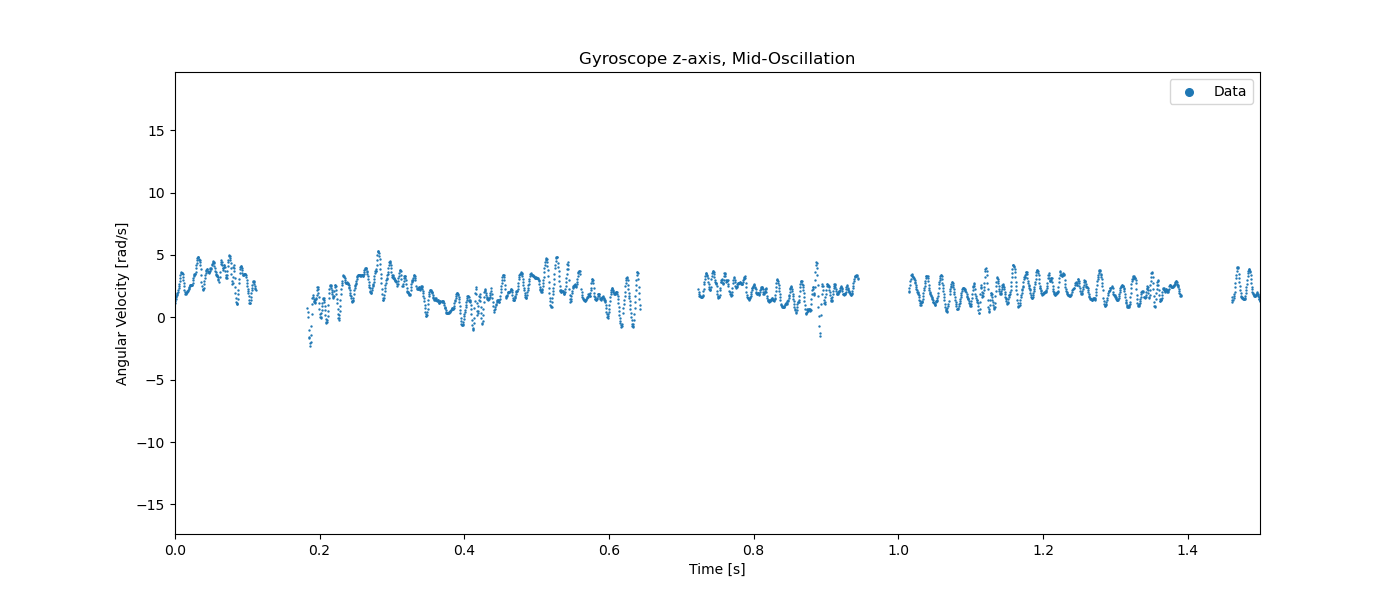

In [388]:
plt.close()
plt.figure(figsize=(14,6))
plt.xlim(0,1.5)
plt.title("Gyroscope z-axis, Mid-Oscillation")
plt.xlabel("Time [s]")
plt.ylabel("Angular Velocity [rad/s]")
t = np.linspace(0, 2,400)
# plt.plot(t, fit[0][2]*np.exp(-(t-fit[0][3])/fit[0][1])*np.sin(t*fit[0][0]-fit[0][4]),'r')
plt.scatter(time,gyroz*bytesToAngularFreq+gyro_offset,s=0.5,zorder=2)
legend = plt.legend(["Data"], scatterpoints=1, fontsize=10)
legend.legend_handles[0]._sizes = [30]
plt.show()

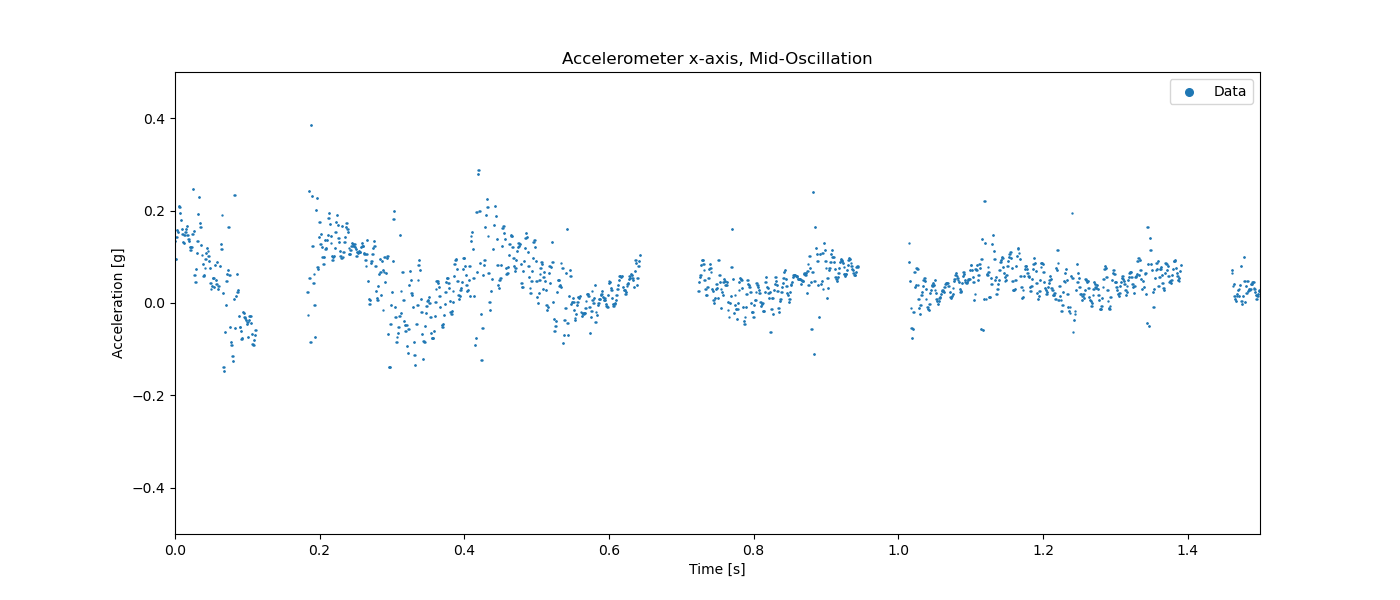

In [392]:
plt.close()
plt.figure(figsize=(14,6))
plt.xlim(0,1.5)
plt.title("Accelerometer x-axis, Mid-Oscillation")
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [g]")
plt.ylim(-0.5,0.5)
t = np.linspace(0, 2,400)
# plt.plot(t, fit[0][2]*np.exp(-(t-fit[0][3])/fit[0][1])*np.sin(t*fit[0][0]-fit[0][4]),'r')
plt.scatter(time,accelx*bytesToGs,s=0.5,zorder=2)
legend = plt.legend(["Data"], scatterpoints=1, fontsize=10)
legend.legend_handles[0]._sizes = [30]
plt.show()

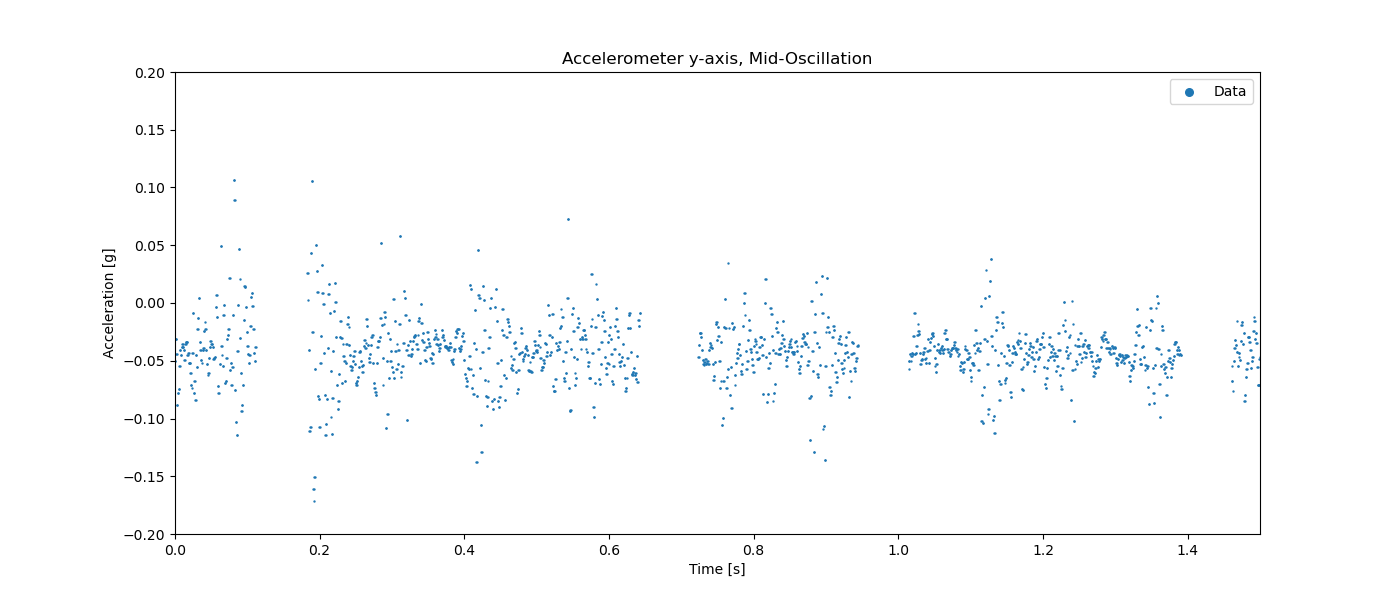

In [394]:
plt.close()
plt.figure(figsize=(14,6))
plt.xlim(0,1.5)
plt.title("Accelerometer y-axis, Mid-Oscillation")
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [g]")
plt.ylim(-0.2,0.2)
t = np.linspace(0, 2,400)
# plt.plot(t, fit[0][2]*np.exp(-(t-fit[0][3])/fit[0][1])*np.sin(t*fit[0][0]-fit[0][4]),'r')
plt.scatter(time,accely*bytesToGs,s=0.5,zorder=2)
legend = plt.legend(["Data"], scatterpoints=1, fontsize=10)
legend.legend_handles[0]._sizes = [30]
plt.show()

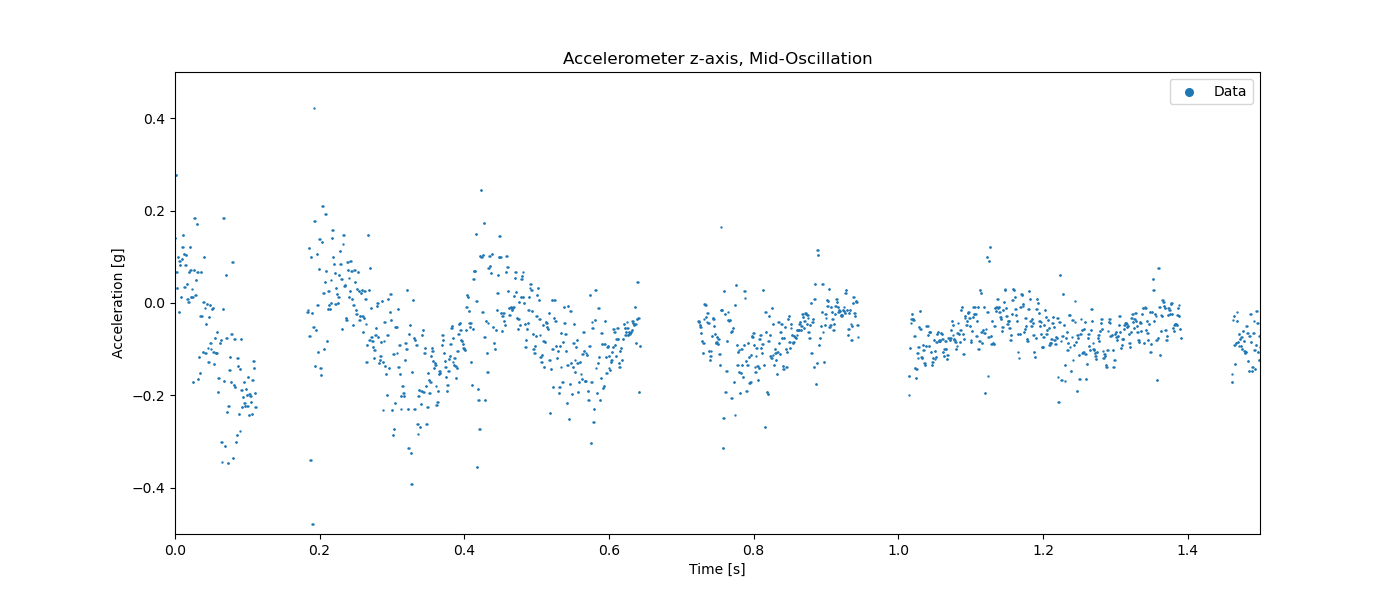

In [397]:
plt.close()
plt.figure(figsize=(14,6))
plt.xlim(0,1.5)
plt.title("Accelerometer z-axis, Mid-Oscillation")
plt.xlabel("Time [s]")
plt.ylabel("Acceleration [g]")
plt.ylim(-0.5,0.5)
t = np.linspace(0, 2,400)
# plt.plot(t, fit[0][2]*np.exp(-(t-fit[0][3])/fit[0][1])*np.sin(t*fit[0][0]-fit[0][4]),'r')
plt.scatter(time,accelz*bytesToGs,s=0.5,zorder=2)
legend = plt.legend(["Data"], scatterpoints=1, fontsize=10)
legend.legend_handles[0]._sizes = [30]
plt.show()